In [10]:
!pip install numpy pandas matplotlib scikit-fuzzy


In [11]:
import pandas as pd

# Baca dataset
df = pd.read_csv("fuzzy_customer_satisfaction.csv")

# Tampilkan 5 baris pertama
df.head()


,Service_Speed,Product_Quality,Satisfaction_Score
0,4.37,8.77,6.30
1,9.56,6.61,8.35
2,7.59,3.98,6.05
3,6.39,1.57,4.05
4,2.40,3.80,2.28


In [12]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Range nilai (1–10)
x_service = np.arange(1, 11, 0.1)
x_quality = np.arange(1, 11, 0.1)
x_satisfaction = np.arange(1, 11, 0.1)

# Membership function untuk Service Speed
service_lambat = fuzz.trimf(x_service, [1, 1, 5])
service_sedang = fuzz.trimf(x_service, [3, 5, 7])
service_cepat = fuzz.trimf(x_service, [5, 10, 10])

# Membership function untuk Product Quality
quality_buruk = fuzz.trimf(x_quality, [1, 1, 5])
quality_cukup = fuzz.trimf(x_quality, [3, 5, 7])
quality_baik = fuzz.trimf(x_quality, [5, 10, 10])

# Membership function untuk Satisfaction Score
satisfaction_tidak = fuzz.trimf(x_satisfaction, [1, 1, 5])
satisfaction_puas = fuzz.trimf(x_satisfaction, [3, 5, 7])
satisfaction_sangat = fuzz.trimf(x_satisfaction, [5, 10, 10])


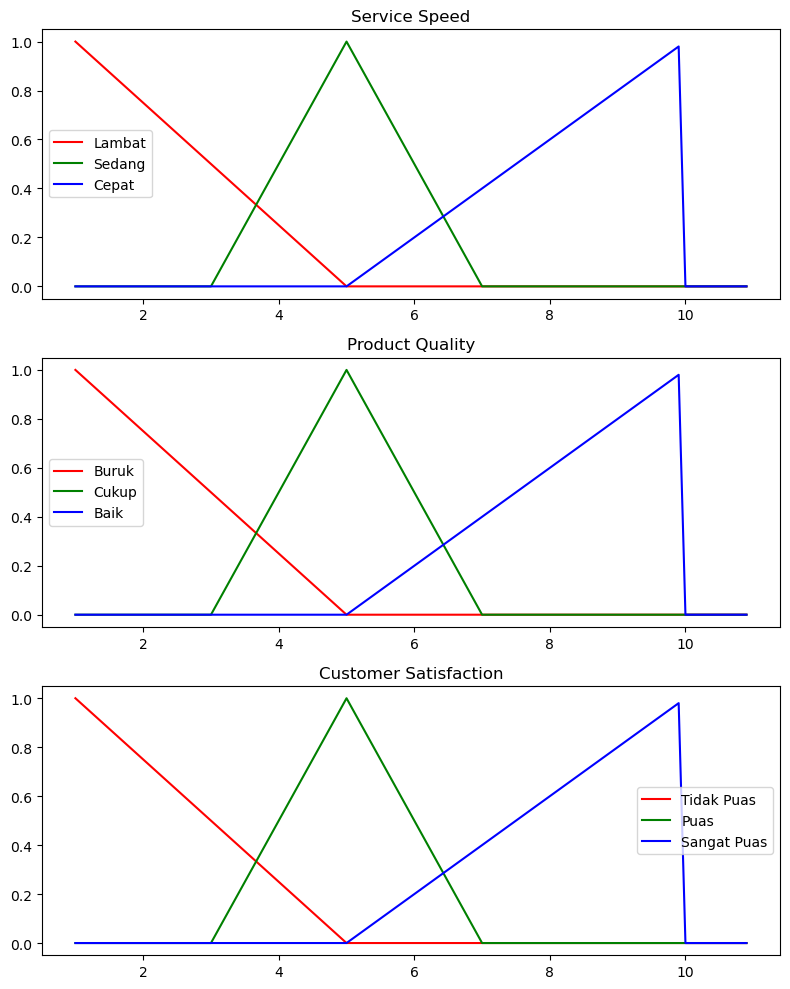

In [13]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 10))

ax0.plot(x_service, service_lambat, 'r', label='Lambat')
ax0.plot(x_service, service_sedang, 'g', label='Sedang')
ax0.plot(x_service, service_cepat, 'b', label='Cepat')
ax0.set_title('Service Speed')
ax0.legend()

ax1.plot(x_quality, quality_buruk, 'r', label='Buruk')
ax1.plot(x_quality, quality_cukup, 'g', label='Cukup')
ax1.plot(x_quality, quality_baik, 'b', label='Baik')
ax1.set_title('Product Quality')
ax1.legend()

ax2.plot(x_satisfaction, satisfaction_tidak, 'r', label='Tidak Puas')
ax2.plot(x_satisfaction, satisfaction_puas, 'g', label='Puas')
ax2.plot(x_satisfaction, satisfaction_sangat, 'b', label='Sangat Puas')
ax2.set_title('Customer Satisfaction')
ax2.legend()

plt.tight_layout()
plt.show()


In [18]:
from skfuzzy import control as ctrl

# Definisikan variabel fuzzy
service = ctrl.Antecedent(np.arange(1, 11, 1), 'service')
quality = ctrl.Antecedent(np.arange(1, 11, 1), 'quality')
satisfaction = ctrl.Consequent(np.arange(1, 11, 1), 'satisfaction')

# Definisikan membership function untuk masing-masing variabel
service['lambat'] = fuzz.trimf(service.universe, [1, 1, 5])
service['sedang'] = fuzz.trimf(service.universe, [3, 5, 7])
service['cepat'] = fuzz.trimf(service.universe, [5, 10, 10])

quality['buruk'] = fuzz.trimf(quality.universe, [1, 1, 5])
quality['cukup'] = fuzz.trimf(quality.universe, [3, 5, 7])
quality['baik'] = fuzz.trimf(quality.universe, [5, 10, 10])

satisfaction['tidak_puas'] = fuzz.trimf(satisfaction.universe, [1, 1, 5])
satisfaction['puas'] = fuzz.trimf(satisfaction.universe, [3, 5, 7])
satisfaction['sangat_puas'] = fuzz.trimf(satisfaction.universe, [5, 10, 10])

# Aturan fuzzy (rules)
rule1 = ctrl.Rule(service['cepat'] & quality['baik'], satisfaction['sangat_puas'])
rule2 = ctrl.Rule(service['sedang'] | quality['cukup'], satisfaction['puas'])
rule3 = ctrl.Rule(service['lambat'] & quality['buruk'], satisfaction['tidak_puas'])
rule4 = ctrl.Rule(service['cepat'] & quality['buruk'], satisfaction['puas'])
rule5 = ctrl.Rule(service['sedang'] & quality['baik'], satisfaction['sangat_puas'])
rule6 = ctrl.Rule(service['lambat'] & quality['baik'], satisfaction['puas'])


# Buat sistem kontrol fuzzy
satisfaction_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
satisfaction_sim = ctrl.ControlSystemSimulation(satisfaction_ctrl)


Tingkat kepuasan prediksi = 8.14


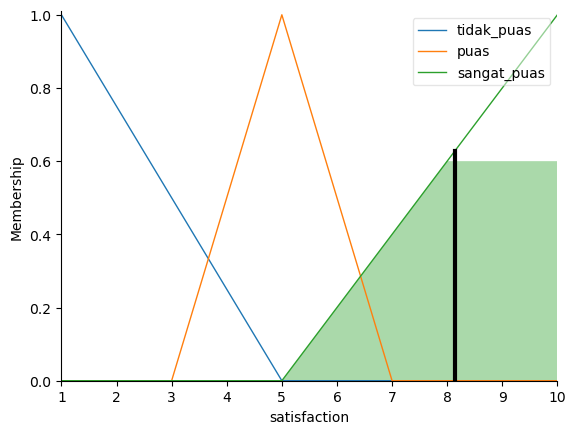

In [19]:
satisfaction_sim.input['service'] = 8
satisfaction_sim.input['quality'] = 9
satisfaction_sim.compute()

print(f"Tingkat kepuasan prediksi = {satisfaction_sim.output['satisfaction']:.2f}")
satisfaction.view(sim=satisfaction_sim)


In [21]:
predicted = []

for i in range(len(df)):
    service_val = df.loc[i, 'Service_Speed']
    quality_val = df.loc[i, 'Product_Quality']

    # Buat ulang simulation setiap kali loop
    satisfaction_sim = ctrl.ControlSystemSimulation(satisfaction_ctrl)

    satisfaction_sim.input['service'] = service_val
    satisfaction_sim.input['quality'] = quality_val

    # Jalankan sistem fuzzy
    satisfaction_sim.compute()

    # Ambil hasil output setelah compute()
    predicted.append(satisfaction_sim.output['satisfaction'])

# Tambahkan ke DataFrame
df['Predicted_Satisfaction'] = np.round(predicted, 2)


In [22]:
# Lihat 10 baris pertama dengan kolom baru hasil fuzzy
df.head(10)


,Service_Speed,Product_Quality,Satisfaction_Score,Predicted_Satisfaction
0,4.37,8.77,6.30,6.82
1,9.56,6.61,8.35,7.00
2,7.59,3.98,6.05,5.00
3,6.39,1.57,4.05,5.00
4,2.40,3.80,2.28,4.00
5,2.40,3.93,3.84,4.13
6,1.52,7.57,4.19,5.00
7,8.80,6.74,7.14,7.27
8,6.41,8.98,6.78,6.65
9,7.37,5.25,6.49,5.26


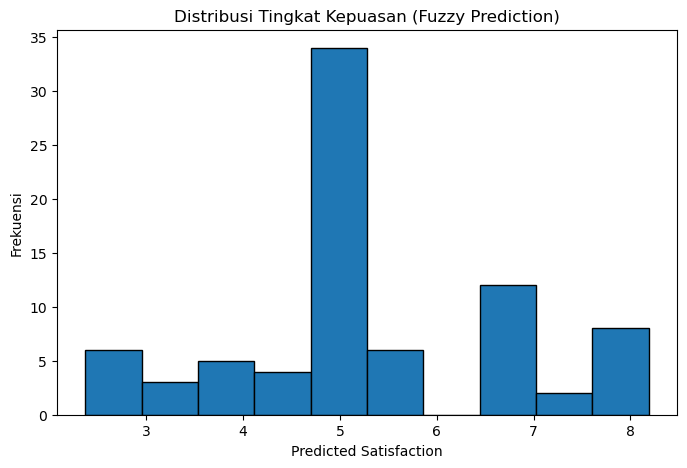

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['Predicted_Satisfaction'], bins=10, edgecolor='black')
plt.title('Distribusi Tingkat Kepuasan (Fuzzy Prediction)')
plt.xlabel('Predicted Satisfaction')
plt.ylabel('Frekuensi')
plt.show()
